In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from CIoTS import *
import time

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
max_ps = list(range(4, 9, 2))
test_ps = list(range(2, 11, 2))
runs = 20
dimensions = 4
data_length = 10000
alpha = 0.05

In [4]:
f1_scores = pd.DataFrame(columns=['true_p', 'p', 'mean_f1', 'std_f1'])
runtimes = pd.DataFrame(columns=['true_p', 'p', 'mean_time', 'std_time'])

In [5]:
for p in max_ps:
    incoming_edges = 3 #max(ceil(dimensions*p/3), 1)
    
    f1 = {p_test: [] for p_test in test_ps}
    runtime = {p_test: [] for p_test in test_ps}
    
    for run in range(runs):
        generator = CausalTSGenerator(dimensions=dimensions, max_p=p, data_length=data_length, incoming_edges=incoming_edges)
        ts = generator.generate()
            
        for p_test in test_ps:
            start_time = time.time()
            predicted_graph = pc_chen_modified(partial_corr_test, ts, p_test, alpha)
            exec_time = time.time()-start_time
            
            f1[p_test].append(evaluate_edges(generator.graph, predicted_graph)['f1-score'])
            runtime[p_test].append(exec_time)
            print('done: p='+ str(p) + ' run='+str(run+1) + ' p_test='+str(p_test) + ' exec_time='+str(exec_time))
    
    for p_test in test_ps:
        f1_scores = f1_scores.append({'true_p': p, 'p': p_test, 'mean_f1': np.mean(f1[p_test]),
                                      'std_f1': np.std(f1[p_test])}, ignore_index=True)
        runtimes = runtimes.append({'true_p': p, 'p': p_test, 'mean_time': np.mean(runtime[p_test]),
                                    'std_time': np.std(runtime[p_test])}, ignore_index=True)

done: p=4 run=1 p_test=2 exec_time=2.0252604484558105
done: p=4 run=1 p_test=4 exec_time=7.836875915527344
done: p=4 run=1 p_test=6 exec_time=21.853820323944092
done: p=4 run=1 p_test=8 exec_time=54.23538565635681
done: p=4 run=1 p_test=10 exec_time=82.95904469490051
done: p=4 run=2 p_test=2 exec_time=0.8542451858520508
done: p=4 run=2 p_test=4 exec_time=5.028505086898804
done: p=4 run=2 p_test=6 exec_time=13.176971197128296
done: p=4 run=2 p_test=8 exec_time=30.117101192474365
done: p=4 run=2 p_test=10 exec_time=39.15522050857544
done: p=4 run=3 p_test=2 exec_time=1.0705671310424805
done: p=4 run=3 p_test=4 exec_time=3.7217624187469482
done: p=4 run=3 p_test=6 exec_time=10.627224445343018
done: p=4 run=3 p_test=8 exec_time=21.681575298309326
done: p=4 run=3 p_test=10 exec_time=37.53425097465515
done: p=4 run=4 p_test=2 exec_time=0.7710905075073242
done: p=4 run=4 p_test=4 exec_time=3.1293275356292725
done: p=4 run=4 p_test=6 exec_time=9.422035455703735
done: p=4 run=4 p_test=8 exec_ti

done: p=6 run=11 p_test=6 exec_time=16.08575987815857
done: p=6 run=11 p_test=8 exec_time=33.05758762359619
done: p=6 run=11 p_test=10 exec_time=49.37740349769592
done: p=6 run=12 p_test=2 exec_time=0.9162611961364746
done: p=6 run=12 p_test=4 exec_time=4.31618070602417
done: p=6 run=12 p_test=6 exec_time=11.5531587600708
done: p=6 run=12 p_test=8 exec_time=23.67918562889099
done: p=6 run=12 p_test=10 exec_time=43.49035382270813
done: p=6 run=13 p_test=2 exec_time=0.657717227935791
done: p=6 run=13 p_test=4 exec_time=3.727285385131836
done: p=6 run=13 p_test=6 exec_time=7.345951795578003
done: p=6 run=13 p_test=8 exec_time=17.11294174194336
done: p=6 run=13 p_test=10 exec_time=23.91374182701111
done: p=6 run=14 p_test=2 exec_time=0.9778492450714111
done: p=6 run=14 p_test=4 exec_time=4.502882480621338
done: p=6 run=14 p_test=6 exec_time=9.341235160827637
done: p=6 run=14 p_test=8 exec_time=17.210639238357544
done: p=6 run=14 p_test=10 exec_time=27.7166268825531
done: p=6 run=15 p_test=

In [6]:
f1_scores

,true_p,p,mean_f1,std_f1
0,4.0,2.0,0.313380,0.097676
1,4.0,4.0,0.560156,0.116840
2,4.0,6.0,0.452907,0.128258
3,4.0,8.0,0.394392,0.142734
4,4.0,10.0,0.385415,0.133961
5,6.0,2.0,0.240020,0.099248
6,6.0,4.0,0.391057,0.119675
7,6.0,6.0,0.661547,0.125512
8,6.0,8.0,0.596114,0.122370
9,6.0,10.0,0.563571,0.126436


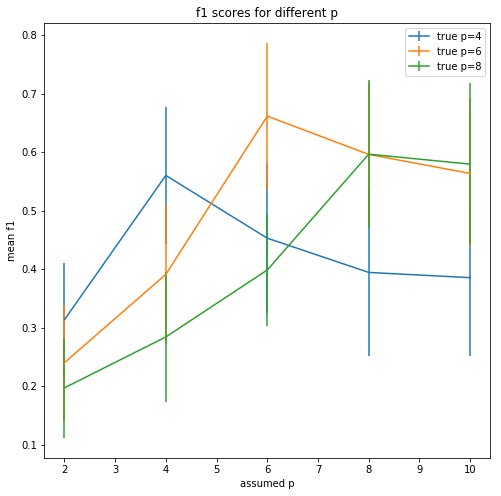

In [8]:
plt.figure(figsize=(8,8))
plt.title('f1 scores for different p')
plt.xlabel('assumed p')
plt.ylabel('mean f1')
handles = []
labels = []
for p in max_ps:
    plt.errorbar(x=f1_scores.loc[f1_scores['true_p']==p, 'p'],
                 y=f1_scores.loc[f1_scores['true_p']==p, 'mean_f1'],
                 yerr=f1_scores.loc[f1_scores['true_p']==p, 'std_f1'],
                 label='true p='+str(p))
plt.legend()
plt.show()

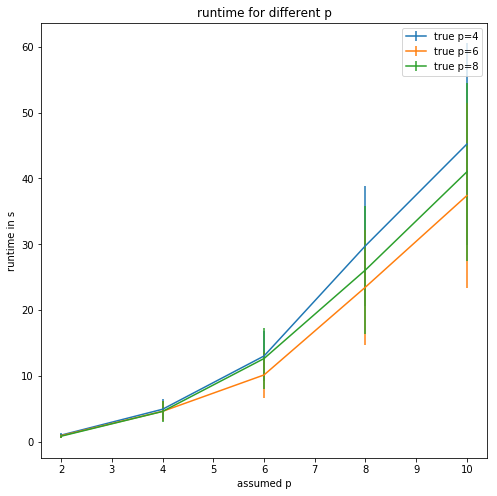

In [9]:
plt.figure(figsize=(8,8))
plt.title('runtime for different p')
plt.xlabel('assumed p')
plt.ylabel('runtime in s')
handles = []
labels = []
for p in max_ps:
    plt.errorbar(x=runtimes.loc[runtimes['true_p']==p, 'p'],
                 y=runtimes.loc[runtimes['true_p']==p, 'mean_time'],
                 yerr=runtimes.loc[runtimes['true_p']==p, 'std_time'],
                 label='true p='+str(p))
plt.legend()
plt.show()